# Music Genre Project
In this project, we will give an analysis to a music dataset in which the music genre will be discussed. Our goal is to study how genre is made to adapt to our audience

In [15]:
"""
Created on Wed Apr 27 22:31:50 2022
Modified on 

@author: JX
"""
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from bokeh.io import output_notebook, show, export_png
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import rcmod
from sklearn.metrics import mean_absolute_percentage_error
rcmod.reset_orig()
file1 = 'D:/Machine Learning/Practice/Music/genres_v2.csv'
file2 = 'D:/Machine Learning/Practice/Music/playlists.csv'
#file2 = 'C:/Users/Jing Xie/Documents/TeachingModel1withPython/playlists.csv'
#file1 = 'C:/Users/Jing Xie/Documents/TeachingModel1withPython/genres_v2.csv'
genr = pd.read_csv(file1, low_memory=False)

## 1. Load the data 

In [16]:
# =============================================================================
# Explor data information
# =============================================================================
play = pd.read_csv(file2)
play = play.rename(columns = {'Genre': 'genre'})
#genr['playlist'] = genr['genr'].map(genr.set_index('genr')['playlists'])
genr_play =pd.merge(genr, play, on = 'genre')

In [17]:
genr_play1 = genr_play[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
                        'time_signature', 'genre']]

Replace the dataframe's columns with 0,1,...7

In [32]:
pd.factorize(genr_play1.loc[:,'genre'])[0]

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [29]:
target = genr_play1['genre']  
target.astype('category')

0        0
1        0
2        0
3        0
4        0
        ..
93871    7
93872    7
93873    7
93874    7
93875    7
Name: genre, Length: 93876, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [30]:
type(target)

pandas.core.series.Series

In [31]:
feature = genr_play1.iloc[:, 0:13]    
X = feature.values
X = StandardScaler().fit_transform(X).T 
y = np.array(target)

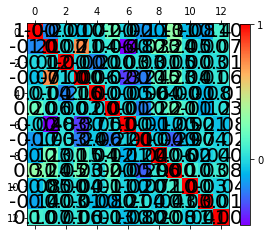

In [8]:
# After standarize to the dataset, we are checking the correlation of each pair of feature variables
cov_data = np.corrcoef(X) 
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1,0,1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=20, color='black', ha="center", va="center")

The heatmap offers us a sense of independent relationships aross those variables we displayed in the dataset

In [9]:
plt.show()


## 2. Numer of features


In [10]:
# Using PCA to determine the number of features
pca = PCA().fit(X)
z = pca.transform(X)

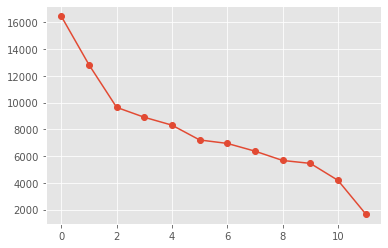

In [11]:
# PCA method for drawing elbow graph
pca = PCA(n_components=0.99)
pca.fit(X)
pca.explained_variance_
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(pca.explained_variance_, marker = "o")

We may need more than 8 components to explain the entire dataset. To look for clusters, we try Kmeans method first. We want to choose the best number of clusters.

In [12]:

from sklearn.cluster import KMeans

Num clusters 2 Inertia: 968243.1999530437
Num clusters 3 Inertia: 835164.6062925616
Num clusters 4 Inertia: 741663.9710800075
Num clusters 5 Inertia: 638779.6920876583
Num clusters 6 Inertia: 543564.894129083
Num clusters 7 Inertia: 448260.2186246354
Num clusters 8 Inertia: 358419.8831693021
Num clusters 9 Inertia: 263274.4789701352
Num clusters 10 Inertia: 170466.67768614885
Num clusters 11 Inertia: 91480.37217160931
Num clusters 12 Inertia: 27105.33107396265


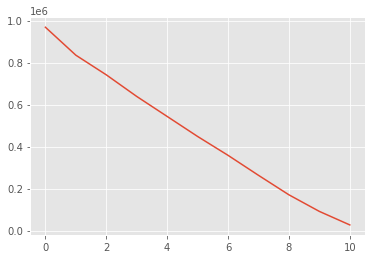

In [13]:
# Check variances in percent for each numer of clusters using kmeans
all_kmeans = [i for i in range(11)]
for i in range(11):
    cur_kmeans = KMeans(i+2)
    cur_kmeans.fit(z)
    print("Num clusters", i+2, "Inertia:", cur_kmeans.inertia_)
    all_kmeans[i] = cur_kmeans.inertia_
plt.plot(range(11), all_kmeans)

Now, we choose numer of clusters is 8. The plot below is the first two dimension of kmeans method

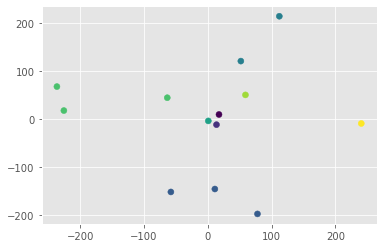

In [14]:
kmeans = KMeans(8, tol=1e-6)
kmeans.fit(z[:,0:12])
plt.scatter(z[:,0],z[:,1], c=kmeans.labels_)

It doesn't display a better elbow plot result. 

breaking at iteration 95 with stress 183988.4958959358
breaking at iteration 37 with stress 195327.08910025994
breaking at iteration 87 with stress 174387.7986791985
breaking at iteration 66 with stress 180840.30376044192


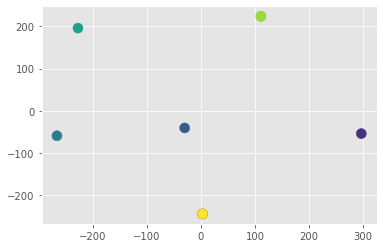

In [16]:
# A scatter plot for the first two of n-samples by method of MDS
from sklearn.manifold import TSNE, MDS, Isomap
import seaborn as sns 
cmeans = np.zeros((8,X.shape[1]))
for c in range(8):
    cmeans[c] = np.mean(X[np.where(kmeans.fit(X).labels_==c)[0]],axis=0)
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds = mds.fit(cmeans)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=list(range(0,8)), s = 100)

<AxesSubplot:>

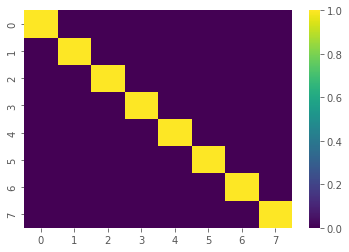

In [17]:
# Look at the map where we found 8 dimentions we can make for a better genre model'
pca = PCA(8)
pca.fit(X)
z_pca = pca.transform(X)
z_pca = pd.DataFrame(z_pca)
sns.heatmap(z_pca.corr(), cmap='viridis')

As far, we have displayed an independent relationship for number of components we chose. 

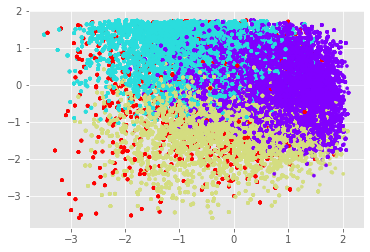

In [20]:
kmeans = KMeans(n_clusters = 4).fit(X.T)
centroids = kmeans.cluster_centers_
plt.scatter(X.T[:,0],X.T[:,1], c = kmeans.labels_, s = 10, cmap ="rainbow")
plt.show()

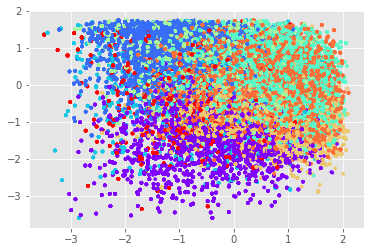

In [19]:
kmeans=KMeans(n_clusters=8).fit(X.T)
plt.scatter(X.T[:,0], X.T[:,1], c = kmeans.labels_, s = 10, cmap = 'rainbow')

The two plots show a contradictory about numer of best clusters we want to achieve. 

In [21]:
# find the best numer of clusters using silhouette
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

In [22]:
pca = PCA(11).fit(X)
z = pca.transform(X)

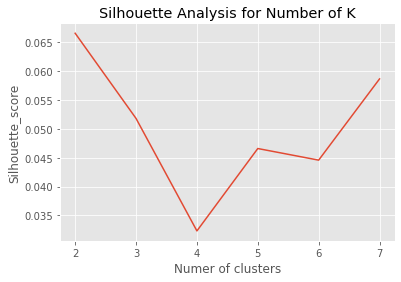

In [23]:
n_slc = range(2,8)
all_slc = []
for i in n_slc:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(z)
    labels = kmeans.labels_
    all_slc.append(silhouette_score(X,labels))
plt.plot(n_slc, all_slc)    
plt.xlabel('Numer of clusters')
plt.ylabel('Silhouette_score')
plt.title('Silhouette Analysis for Number of K')
plt.show()

0
2
4


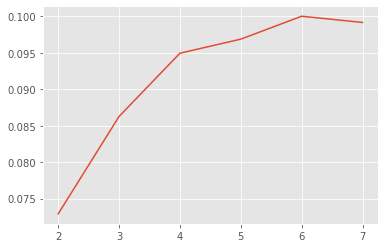

In [24]:
all_slc = [i for i in range(8)]
for i in range(6):
    if i % 2==0:
        print(i)
    slc = AgglomerativeClustering(n_clusters=i+2, linkage="ward")
    slc.fit(z)
    all_slc[i] = slc
plt.plot([i+2 for i in range(6)], [silhouette_score(z,all_slc[i].labels_) for i in range(6)])

In [25]:
best_index = 2 + np.argmax([silhouette_score(z,all_slc[i].labels_) for i in range(2,6)])
# Number of clusters is index + 2
print("Number of clusters:",best_index+2)

Number of clusters: 6


Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

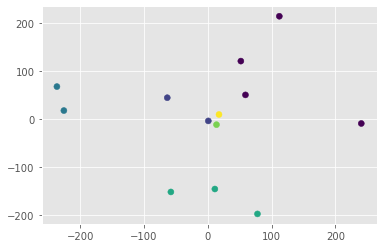

In [26]:
plt.scatter(z[:,0],z[:,1],c=all_slc[best_index].labels_)
labels = all_slc[best_index].labels_
# check levels of labels
s = pd.Series(labels, dtype='category')
s.cat.categories

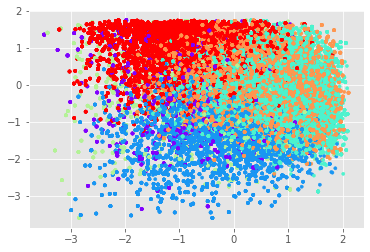

In [28]:
kmeans=KMeans(n_clusters=6).fit(X.T)
plt.scatter(X.T[:,0], X.T[:,1], c = kmeans.labels_, s = 10, cmap = 'rainbow')

By hierarical classification, when taking cluster of 6, we achieve the best performance for constructing a model

Let's work on model evaluations


## 3. Model Evaluation 


In [61]:
X = X.T
labels = target
X_centered = X - np.mean(X,axis=0)
locs_nz = np.where(np.std(X_centered,axis=0)>0)[0]
X_standardized = X_centered
X_standardized[:,locs_nz] /= np.std(X_centered[:,locs_nz],axis=0)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr21 = LogisticRegression(penalty='l2',C=0.1)
lr21.fit(X,labels)
lr21.score(X, labels)

0.534652094251992

In [64]:
lr21_sd = LogisticRegression(penalty='l2',C=0.1)
lr21_sd.fit(X_standardized, labels)
lr21_sd.score(X_standardized, labels)


0.534652094251992

Before standarized

In [65]:
coef_abs = np.abs(lr21.coef_)
max_coefs = np.max(coef_abs,axis=0)
features=np.argpartition(max_coefs, -10)[-10:]

In [67]:
# After standarized
coef_abs = np.abs(lr21_sd.coef_)
max_coefs = np.max(coef_abs,axis=0)
features_std=np.argpartition(max_coefs, -10)[-10:]

Let's work on model evaluation

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.5, random_state=0)

In [69]:
means = np.mean(X_train,axis=0)
X_train_centered = X_train - means
sds = np.std(X_train_centered,axis=0)
locs_nz_train = np.where(sds>0)[0]
X_train_standardized = X_train_centered
X_train_standardized[:,locs_nz_train] /= sds[locs_nz_train]
X_test_standardized = X_test - means
X_test_standardized[:,locs_nz_train] /= sds[locs_nz_train]

In [70]:
lr21 = LogisticRegression(penalty='l2',C=0.1).fit(X_train[:,features],y_train)
lr21.score(X_train[:,features], y_train)

0.5318718309259023

In [71]:
lr21.fit(X_test[:,features],y_test)
lr21.score(X_test[:,features], y_test)

0.5325109719204056

In [72]:
lr21.fit(X_test[:,features_std],y_test)
lr21.score(X_test[:,features_std], y_test)

0.5325109719204056

In [74]:
variances = np.var(X_train, axis=0)
v_features=np.argpartition(variances, -10)[-10:]

In [75]:
lr21.fit(X_test[:,v_features],y_test)
lr21.score(X_test[:,v_features], y_test)
#lr21.predict(X_test[:,features])

0.4637394009118411

This music model doesn't show a better estimation about important features regarding their variances.

(array([8., 2.]),
 array([0.99750308, 1.0127485 , 1.02799392]),
 <BarContainer object of 2 artists>)

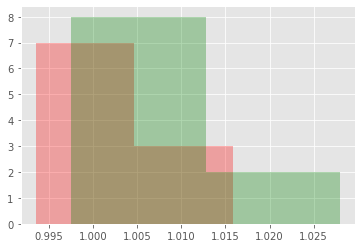

In [76]:
plt.hist(variances[features],color="red",alpha=0.3,bins=2)
plt.hist(variances[v_features],color="green",alpha=0.3,bins=2)

In [78]:
# After regulation 
lr22 = LogisticRegression(penalty='l2',C=0.01)
lr22.fit(X,labels)
lr22.score(X, labels)

0.5348118795006178

In [79]:
coef_abs = np.abs(lr22.coef_)
max_coefs = np.max(coef_abs,axis=0)
features_reg1=np.argpartition(max_coefs, -10)[-10:]

In [80]:
lr22.fit(X_train[:,features_reg1],y_train)
lr22.score(X_test[:,features_reg1], y_test)

0.5326174954194896

In [81]:
lr22.fit(X_test[:,v_features],y_test)
lr22.score(X_test[:,v_features], y_test)

0.4644637607056117

(array([7., 3.]),
 array([0.99353076, 1.00469938, 1.015868  ]),
 <BarContainer object of 2 artists>)

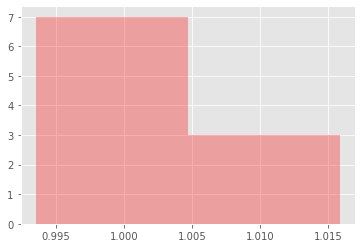

In [85]:
plt.hist(variances[features],color="red",alpha=0.3,bins=2)
#plt.hist(variances[v_features],color="green",alpha=0.3,bins=2)
#plt.hist(variances[features_reg1],color="blue",alpha=0.3,bins=2)

Perform on LogisticregressionCV Model 

In [126]:
# for non-standarized
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.5, random_state=0)
lr31 = LogisticRegressionCV(penalty="l1",solver="liblinear",Cs=[.1,1,10],cv=3)
lr31.fit(X, labels)
lr31.score(X, labels)
coef_abs = np.abs(lr31.coef_)
max_coefs = np.max(coef_abs,axis=0)
features=np.argpartition(max_coefs, -10)[-10:]
lr31.fit(X_train[:,features], y_train)
lr31.score(X_test[:,features], y_test)

0.5274830627636456

In [87]:
# for standarized 
means = np.mean(X_train,axis=0)
X_train_centered = X_train - means
sds = np.std(X_train_centered,axis=0)
locs_nz_train = np.where(sds>0)[0]
X_train_standardized = X_train_centered
X_train_standardized[:,locs_nz_train] /= sds[locs_nz_train]
X_test_standardized = X_test - means
X_test_standardized[:,locs_nz_train] /= sds[locs_nz_train]
lr31_sd = LogisticRegressionCV(penalty="l1",solver="liblinear",Cs=[.1,1,10],cv=3)
lr31_sd.fit(X_train_standardized[:,features], y_train)
lr31_sd.score(X_test_standardized[:,features],y_test )
variances = np.var(X_train, axis=0)
v_features=np.argpartition(variances, -10)[-10:]
lr31.fit(X_train[:,v_features],y_train)
lr31.score(X_test[:,v_features], y_test)

0.4614811027312625

We found the model didn't perform better for standarization 

In [88]:
# after regulization
lr32 = LogisticRegressionCV(penalty="l1",solver="liblinear",Cs=[0.01,0.1,1],cv=3)
lr32.fit(X, labels)
#lr32.score(X, labels)
coef_abs = np.abs(lr32.coef_)
max_coefs = np.max(coef_abs,axis=0)
features_reg=np.argpartition(max_coefs, -10)[-10:]
lr32.fit(X_train[:,features_reg], y_train)
lr32.score(X_test[:,features_reg], y_test)

0.5282500319570497

In [89]:
# consider variance when selecting features
variances = np.var(X_train, axis=0)
v_features=np.argpartition(variances, -10)[-10:]
lr32.fit(X_train[:,v_features],y_train)
lr32.score(X_test[:,v_features], y_test)

0.46092718053602627

(array([7., 3.]),
 array([0.99353076, 1.00469938, 1.015868  ]),
 <BarContainer object of 2 artists>)

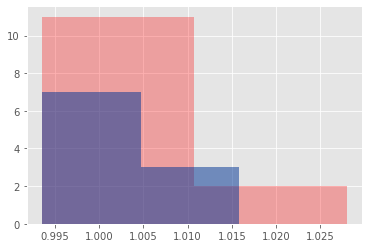

In [90]:
plt.hist(variances,color="red",alpha = 0.3, bins=2)
plt.hist(variances[features],color="green",alpha=0.3,bins=2)
plt.hist(variances[features_reg],color="blue",alpha=0.3,bins=2)

## 5. Further Study to Models

To further improve model performance, we start to use SMOTE 

-  SMOTE for Data Imbalance

In [101]:
from imblearn.over_sampling import SMOTE
import random
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(
    X.T, y, test_size=0.5, random_state=0)
oversample = SMOTE(k_neighbors=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [102]:
X_train.shape

(91728, 13)

In [103]:
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.995, random_state=0)

In [104]:
X_train.shape

(458, 13)

In [105]:
# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(y_train, return_counts=True)
proportions = counts / len(y_train)

In [106]:
# Calculate Shannon entropy
shannon_entropy = -np.sum(proportions * np.log(proportions))

In [107]:
print(f'Shannon entropy: {shannon_entropy:.2f}')

Shannon entropy: 2.07


In [108]:
y_train[:10]

array([2, 3, 3, 7, 6, 0, 6, 1, 4, 4], dtype=int64)

<AxesSubplot:title={'center':'Count (target)'}>

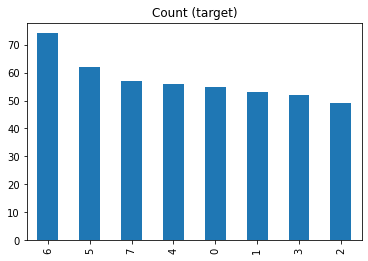

In [109]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Count (target)')

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
random.seed(10)
top_features = 10
lr41 = ExtraTreesClassifier(n_estimators=X_train.shape[0], max_depth=5, random_state=0)
lr41.fit(X_train, y_train)
importances = lr41.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in lr41.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:top_features]

In [111]:
print('Top features:')
for f in range(top_features):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 7 (0.172012)
2. feature 5 (0.134917)
3. feature 0 (0.122471)
4. feature 10 (0.101979)
5. feature 11 (0.099691)
6. feature 1 (0.092883)
7. feature 9 (0.086277)
8. feature 3 (0.066964)
9. feature 6 (0.041613)
10. feature 2 (0.025824)


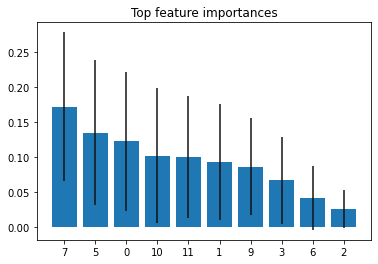

In [112]:
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(top_features), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(top_features), indices)
plt.show()

In [113]:
lr41.score(X_train, y_train)

0.7751091703056768